<h1>Data Aquisition</h1>

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator



[notice] A new release of pip is available: 24.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
base_dir = 'gtFine_trainvaltest/gtFine'  # Replace with your dataset path

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')


<h1>Data Preprocessing</h1>

In [4]:
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values
    rotation_range=40,           # Random rotations
    width_shift_range=0.2,       # Horizontal shifts
    height_shift_range=0.2,      # Vertical shifts
    shear_range=0.2,             # Shear transformations
    zoom_range=0.2,              # Zoom
    horizontal_flip=True,        # Horizontal flips
    fill_mode='nearest'          # Filling strategy
)

test_val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical' 
)

validation_generator = test_val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)


Found 8925 images belonging to 18 classes.
Found 1500 images belonging to 3 classes.
Found 4575 images belonging to 6 classes.


<h1>Data Exploration</h1>


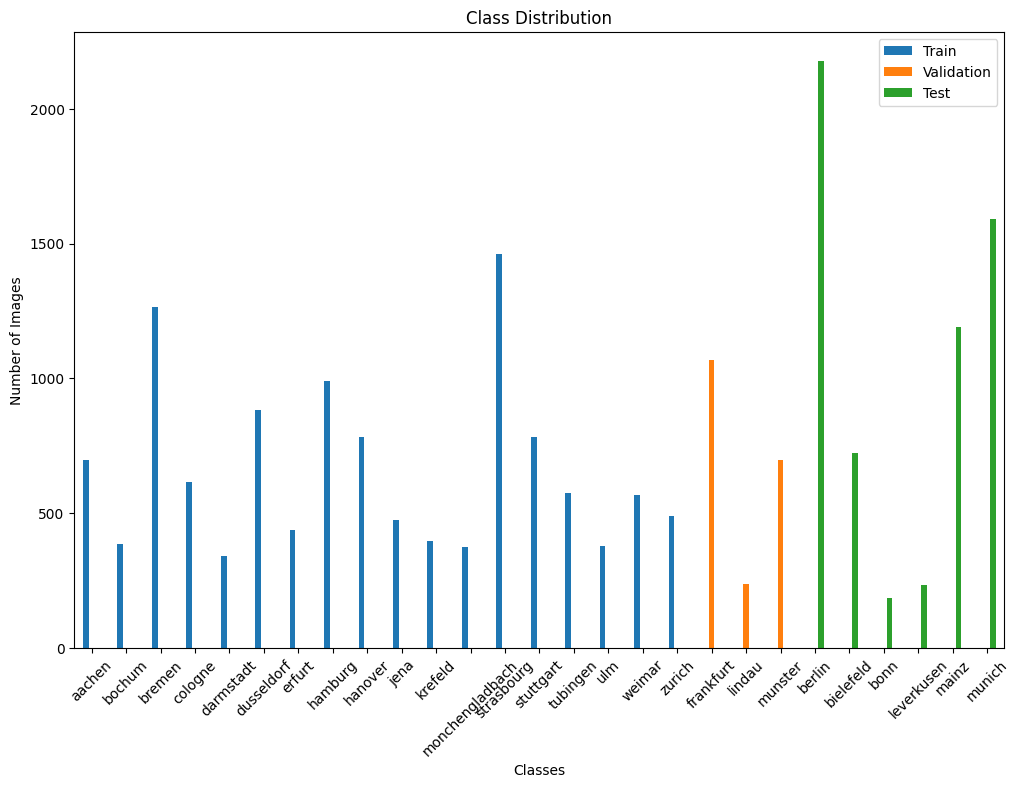

In [5]:
# Function to get counts per class
def get_class_counts(directory):
    class_counts = {}
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        if os.path.isdir(class_path):
            count = len(os.listdir(class_path))
            class_counts[class_dir] = count
    return class_counts

# Get counts
train_counts = get_class_counts(train_dir)
val_counts = get_class_counts(val_dir)
test_counts = get_class_counts(test_dir)

# Create DataFrame
counts_df = pd.DataFrame({
    'Train': train_counts,
    'Validation': val_counts,
    'Test': test_counts
}).fillna(0).astype(int)

# Plot
counts_df.plot(kind='bar', figsize=(12,8))
plt.title('Class Distribution')
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [ ]:
from PIL import Image

def get_image_sizes(directory):
    sizes = []
    for class_dir in os.listdir(directory):
        class_path = os.path.join(directory, class_dir)
        if os.path.isdir(class_path):
            for img_name in os.listdir(class_path):
                img_path = os.path.join(class_path, img_name)
                try:
                    with Image.open(img_path) as img:
                        sizes.append(img.size)
                except:
                    continue
    return sizes

# Get sizes for training set
sizes = get_image_sizes(train_dir)
widths, heights = zip(*sizes)

# Plot histograms
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(widths, bins=30, kde=True, color='blue')
plt.title('Image Width Distribution')
plt.xlabel('Width (pixels)')

plt.subplot(1,2,2)
sns.histplot(heights, bins=30, kde=True, color='green')
plt.title('Image Height Distribution')
plt.xlabel('Height (pixels)')

plt.tight_layout()
plt.show()
